In [1]:
import numpy as np
import matplotlib.pyplot as plt

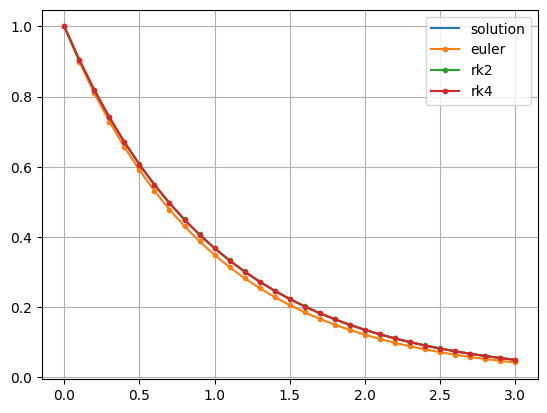

In [2]:
def euler(f, t0, x0, b, h = 0.1, return_last=False):
    n = int((b - t0) / h)
    t = np.empty(n+1)
    x = np.empty(n+1)
    t[0] = t0
    x[0] = x0
    for i in range(1, n+1):
        x[i] = x[i-1] + h * f(t[i-1], x[i-1])
        t[i] = t[i-1] + h
    if return_last:
        return x[-1]
    return t, x


def rk2(f, t0, x0, b, h = 0.1, return_last=False):
    n = int((b - t0) / h)
    t = np.empty(n+1)
    x = np.empty(n+1)
    t[0] = t0
    x[0] = x0
    for i in range(1, n+1):
        x_tmp = x[i-1] + h * f(t[i-1], x[i-1])
        x[i] = x[i-1] + h * (f(t[i-1], x[i-1]) + f(t[i-1], x_tmp)) / 2
        t[i] = t[i-1] + h
    if return_last:
        return x[-1]
    return t, x


def rk4(f, t0, x0, b, h = 0.1, return_last=False):
    n = int((b - t0) / h)
    t = np.empty(n+1)
    x = np.empty(n+1)
    t[0] = t0
    x[0] = x0
    for i in range(1, n+1):
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h/2, x[i-1] + h/2 * k1)
        k3 = f(t[i-1] + h/2, x[i-1] + h/2 * k2)
        k4 = f(t[i-1] + h, x[i-1] + h*k3)
        x[i] = x[i-1] + h/6*(k1 + 2*k2+ 2*k3+ k4)
        t[i] = t[i-1] + h
    if return_last:
        return x[-1]
    return t, x


def f(t, x):
    return -x

def plt_show():
    plt.grid()
    plt.legend()
    plt.show()

t0, x0 = euler(f, t0=0, x0=1, b=3)
t1, x1 = rk2(f, t0=0, x0=1, b=3)
t2, x2 = rk4(f, t0=0, x0=1, b=3)
t_solution = t0
x_solution = np.exp(-t_solution)
plt.plot(t_solution, x_solution, label="solution")
plt.plot(t0, x0, marker = ".", label="euler")
plt.plot(t1, x1, marker = ".", label="rk2")
plt.plot(t2, x2, marker = ".", label="rk4")
plt_show()

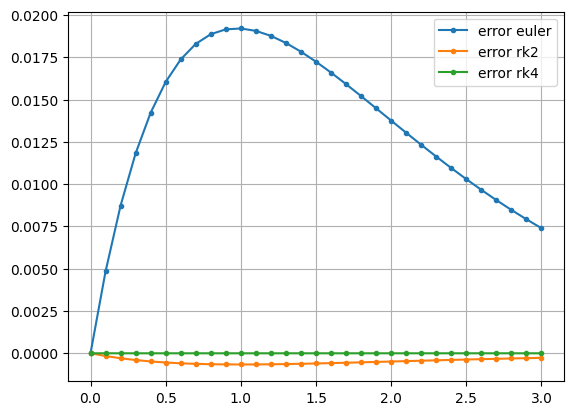

In [3]:
plt.plot(t0, x_solution-x0, marker = ".", label="error euler")
plt.plot(t0, x_solution-x1, marker = ".", label="error rk2")
plt.plot(t0, x_solution-x2, marker = ".", label="error rk4")
plt_show()

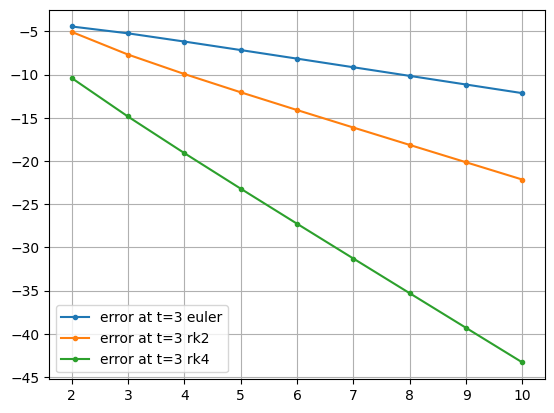

In [4]:
x_sol = x_solution[-1]
n_array = np.array([2**i for i in range(2, 11)])
x_euler = np.zeros(n_array.shape)
x_rk2 = np.zeros(n_array.shape)
x_rk4 = np.zeros(n_array.shape)
t0 = 0
x0 = 1
b = 3
for i, n in enumerate(n_array):
    h = (b - t0) / n
    x_euler[i] = abs(euler(f, t0=t0, x0=x0, b=b, h=h, return_last=True) - x_sol)
    x_rk2[i] = abs(rk2(f, t0=t0, x0=x0, b=b, h=h, return_last=True) - x_sol)
    x_rk4[i] = abs(rk4(f, t0=t0, x0=x0, b=b, h=h, return_last=True) - x_sol)
    
plt.plot(np.log2(n_array), np.log2(x_euler), marker = ".", label=f"error at t={b} euler")
plt.plot(np.log2(n_array), np.log2(x_rk2), marker = ".", label=f"error at t={b} rk2")
plt.plot(np.log2(n_array), np.log2(x_rk4), marker = ".", label=f"error at t={b} rk4")
plt_show()